In [ ]:
pwd

In [ ]:
import re
import pandas as pd

In [ ]:
f= open('E:\Projects\whatsApp\WhatsAppChatAnalysis\Sample-Chats\WhatsApp Chat with Class 12- M😊 NEW(21-22).txt', 'r', encoding= 'utf-8')

In [ ]:
data= f.read()

In [ ]:
print(type(data))

In [ ]:
pattern= '\d{1,2}/\d{1,2}/\d{1,2}, \d{1,2}:\d{1,2} \s?(?:a|p)\.?m\.? - +'

In [ ]:
messages= re.split(pattern
                   , data)[1:]

In [ ]:
dates= re.findall(pattern, data)
dates

In [ ]:
df= pd.DataFrame({'user_messsage': messages, 'message_date': dates})

In [ ]:
df['message_date']= pd.to_datetime(df['message_date'], format= "%d/%m/%y, %I:%M %p - ")

In [ ]:
df.head(10)

In [ ]:
df.shape

In [ ]:
df.rename(columns= {'message_date': 'date'}, inplace= True)
df.head(10)

In [ ]:
lstU=[] # list for users
lstM=[] # list for messages
msg= "Aanchal BCA changed this group's icon"
for msg in df['user_messsage']:
    entry= re.split('([\w\W]+?):\s', msg)
    print(entry)

    if entry[1:]:
        lstU.append(entry[1])
        lstM.append(entry[2])
    else:
        lstU.append('group_notification')
        lstM.append(entry[0])

# print(lstU)
# print(lstM)

In [ ]:
# users= []
# messages= []
# for message in df['user_messsage']:
#     entry= re.split('/([\w\W]+?):\s', message)
#     print(entry)
#     if entry[1:]:
#         users.append(entry[1])
#         messages.append(entry[2])
#     else:
#         users.append('group_notification')
#         messages.append(entry[0])



In [ ]:
lstU

In [ ]:
df['users']= lstU
df['message']= lstM

In [ ]:
df.drop(columns= ['user_messsage'], inplace= True)
df.head()

In [ ]:
# df['date'] # all dates 

In [ ]:
df['year']= df['date'].dt.year # get years from date
df.head()

In [ ]:
df['month']= df['date'].dt.month_name() # get the name of months
df.head()

In [ ]:
df['day']= df['date'].dt.day # get the day
df['hour']= df['date'].dt.hour # get the hour
df['minute']= df['date'].dt.minute # get the minute

df.head(20)


In [ ]:
words= []
for message in df['message']:
    # print(message)
    words.extend(message.split())
len(words)

In [ ]:
from urlextract import URLExtract
extractor= URLExtract()
urls= extractor.find_urls("I have google.com, bing.com and sometimes I work with drive.com")
urls

In [ ]:
links= []
for message in df['message']:
    # print(extractor.find_urls(message))
    links.extend((extractor.find_urls(message)))
links

In [ ]:
len(links)

In [ ]:
x= df['users'].value_counts().head()
x

In [ ]:
import matplotlib.pyplot as plt

name= x.index
count= x.values

In [ ]:
plt.bar(name, count)
plt.xticks(rotation= 'vertical')
plt.show()

In [ ]:
# percentage how much every user participated 
x = round((df['users'].value_counts()/df.shape[0])*100, 2) 
x

In [ ]:
x=x.reset_index() # dataframe
x

In [ ]:
x= x.rename(columns={'index': 'names', 'users': 'percentage'})
x

In [ ]:
round((df['users'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index': 'names', 'users': 'percentage'})


In [ ]:
df[df['users']=='group_notification']

In [ ]:
# Removing Group Notifications and Media Messages !!!

temp= df[df['users']!='group_notification']
temp = temp[temp['message'] != '<Media omitted>\n']
temp

In [ ]:
# removing stop words

f= open('hinglish.txt', 'r')
stop_words= f.read()
print(stop_words)

In [ ]:
words = []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)


In [ ]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))


In [ ]:
words= []
for message in df['message']:
    words.extend(message.split())

In [ ]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

In [ ]:
def most_common_words(selected_user, df):
    if selected_user != 'Overall':
        df = df[df['users'] == selected_user]

    # Removing Group Notifications and Media Messages !!!
    temp = df[df['users'] != 'group_notification']
    temp = temp[temp['message'] != '<Media omitted>\n']
    temp = temp[temp['message'] != '<media omitted>']

    # removing stop words
    f = open('hinglish.txt', 'r')
    stop_words = f.read()
    words = []
    for message in temp['message']:
        print(message)
        for word in message.lower().split():
            if word not in stop_words:
                words.append(word)
    most_common_df = pd.DataFrame(Counter(words).most_common(20))
    return most_common_df


In [ ]:
most_common_words('Overall', df)


In [ ]:
df.head()

In [ ]:
import emoji

In [ ]:
emojis= []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI_ALIAS_ENGLISH])

In [92]:
type(emojis)

list

In [94]:
c= Counter(emojis).most_common(len(Counter(emojis)))


In [98]:
c= pd.DataFrame(c)
c= c.rename(columns={0: "emoji"})
c

,emoji,1
0,👍,61
1,🏻,9
2,😊,1
3,👇,1
4,👆,1
5,💥,1


In [90]:
# pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,👍,61
1,🏻,9
2,😊,1
3,👇,1
4,👆,1
5,💥,1


In [ ]:
df['month_num'] = df['date'].dt.month
df.head()


In [ ]:
timeline = df.groupby(['year', 'month_num', 'month']).count()['message']
timeline


In [ ]:
timeline = timeline.reset_index()
timeline


In [ ]:
time= []
for i in range(timeline.shape[0]):
    # print(timeline['month'][i]+ '-'+ str(timeline['year'][i]))
    time.append(timeline['month'][i]+ '-'+ str(timeline['year'][i]))

In [ ]:
time

In [ ]:
timeline['time']= time
timeline

In [ ]:
plt.plot(timeline['time'], timeline['message'])
plt.xticks(rotation= 'vertical')
plt.show()

In [ ]:
df['day_num'] = df['date'].dt.date 
df.head()

In [ ]:
daily_timeline = df.groupby('day_num').count()['message'].reset_index()

daily_timeline

In [ ]:
plt.plot(daily_timeline['day_num'], daily_timeline['message'])
plt.xticks(rotation='vertical')
plt.figure(figsize=(40, 10))
plt.show()


In [ ]:
print("No Emojis Selected Chat "+ emoji.emojize(":grinning_face_with_big_eyes:", use_aliases= True))

In [ ]:
print(emoji.emojize(""))


In [ ]:
df['day_name']= df['date'].dt.day_name()
df['day_name'].value_counts()


In [ ]:
df['month'].value_counts()


In [ ]:
period= []
for hour in df[['day_name', 'hour']]['hour']:
    if hour==23:
        period.append(str(hour)+ '-'+ str("00"))
    elif hour==0:
        period.append(str('00')+ '-'+ str(hour+1))
    else:
        period.append(str(hour)+ '-'+ str(hour+1))


period

In [64]:
df['period']= period
df.head()

,date,users,message,year,month,day,hour,minute,month_num,day_num,day_name,period
0,2021-04-10 05:16:00,group_notification,"Deepika Bagadwal Madam created group ""Class 12...",2021,April,10,5,16,4,2021-04-10,Saturday,5-6
1,2021-04-10 05:16:00,group_notification,You were added\n,2021,April,10,5,16,4,2021-04-10,Saturday,5-6
2,2021-11-27 13:10:00,suraj sr,"Dear students,\nkindly clear your dues before ...",2021,November,27,13,10,11,2021-11-27,Saturday,13-14
3,2021-12-02 18:01:00,suraj sr,Dear Parents \nAs you all are aware that Term...,2021,December,2,18,1,12,2021-12-02,Thursday,18-19
4,2021-12-03 07:42:00,suraj sr,*Good morning my dear students*\nDo well in yo...,2021,December,3,7,42,12,2021-12-03,Friday,7-8


In [89]:
pivot_table= pd.pivot_table(df, index='day_name', columns='period', values='message', aggfunc='count')
pivot_table

period,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,4-5,5-6,7-8,8-9,9-10
day_name,,,,,,,,,,,,,,,,,
Friday,5.0,0.0,6.0,6.0,0.0,2.0,0.0,0.0,3.0,5.0,0.0,1.0,0.0,0.0,1.0,4.0,14.0
Monday,3.0,2.0,8.0,4.0,0.0,0.0,1.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,1.0,10.0,7.0
Saturday,7.0,18.0,28.0,7.0,0.0,7.0,8.0,5.0,0.0,2.0,1.0,1.0,1.0,2.0,0.0,2.0,11.0
Sunday,3.0,5.0,0.0,6.0,6.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Thursday,5.0,2.0,9.0,0.0,4.0,1.0,0.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,4.0,10.0
Tuesday,7.0,6.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0
Wednesday,2.0,3.0,3.0,7.0,2.0,3.0,2.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,10.0


In [72]:
import seaborn as sns


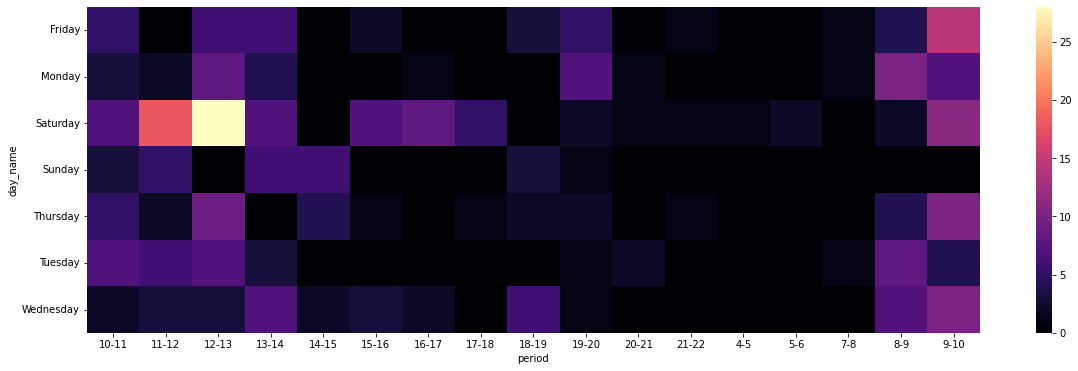

In [86]:
plt.figure(figsize=(20, 6))
plt.yticks(rotation='horizontal')
cmap = sns.color_palette("magma", as_cmap=True)
sns.heatmap(pivot_table.fillna(0), cmap=cmap)
plt.show()
